In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\prern\AppData\Local\Temp\ipykernel_10512\34522798.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was too old on your system - pyarrow 10.0.1 is the current minimum supported version as of this release.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\prern\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Loading data
df = pd.read_csv(r"D:\projects\global retail sales\data\archive (24)\merch_sales.csv")

In [3]:
df.head()

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating,Review
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,100,1,100,4,The delivery team handled the product with care.
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,100,1,100,3,Had slight delays but the product was in good ...
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,49,1,49,2,Waste of Money.
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,9,2,18,3,Had slight delays but the product was in good ...
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,10,3,30,5,Lack of delivery delays is greatly appreciated.


In [4]:
# Size of the dataset
df.shape

(7394, 15)

In [5]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                7394 non-null   int64 
 1   Order Date              7394 non-null   object
 2   Product ID              7394 non-null   object
 3   Product Category        7394 non-null   object
 4   Buyer Gender            7394 non-null   object
 5   Buyer Age               7394 non-null   int64 
 6   Order Location          7394 non-null   object
 7   International Shipping  7394 non-null   object
 8   Sales Price             7394 non-null   int64 
 9   Shipping Charges        7394 non-null   int64 
 10  Sales per Unit          7394 non-null   int64 
 11  Quantity                7394 non-null   int64 
 12  Total Sales             7394 non-null   int64 
 13  Rating                  7394 non-null   int64 
 14  Review                  7394 non-null   object
dtypes: i

In [6]:
# Checking for duplicates
df.duplicated().sum()

0

In [7]:
# Basic statistics
df.describe()

,Order ID,Buyer Age,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating
count,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000
mean,159735.134028,26.455504,55.165404,14.633487,69.798891,1.668109,115.832026,3.499053
std,23040.247194,5.208202,39.575614,24.815719,46.702326,1.081398,118.067960,1.389731
min,120005.000000,18.000000,9.000000,0.000000,9.000000,1.000000,9.000000,1.000000
25%,139895.750000,22.000000,15.000000,0.000000,20.000000,1.000000,40.000000,3.000000
50%,159577.500000,26.000000,65.000000,0.000000,65.000000,1.000000,90.000000,4.000000
75%,179869.750000,31.000000,97.000000,40.000000,100.000000,2.000000,137.000000,5.000000
max,199994.000000,35.000000,130.000000,100.000000,230.000000,5.000000,1000.000000,5.000000


In [8]:
# Converting 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors = 'coerce')

In [9]:
# Checking for missing values now
df.isnull().sum()

Order ID                  0
Order Date                0
Product ID                0
Product Category          0
Buyer Gender              0
Buyer Age                 0
Order Location            0
International Shipping    0
Sales Price               0
Shipping Charges          0
Sales per Unit            0
Quantity                  0
Total Sales               0
Rating                    0
Review                    0
dtype: int64

In [10]:
df.head()

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating,Review
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,100,1,100,4,The delivery team handled the product with care.
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,100,1,100,3,Had slight delays but the product was in good ...
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,49,1,49,2,Waste of Money.
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,9,2,18,3,Had slight delays but the product was in good ...
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,10,3,30,5,Lack of delivery delays is greatly appreciated.


C:\Users\prern\AppData\Local\Temp\ipykernel_10512\3107313747.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')


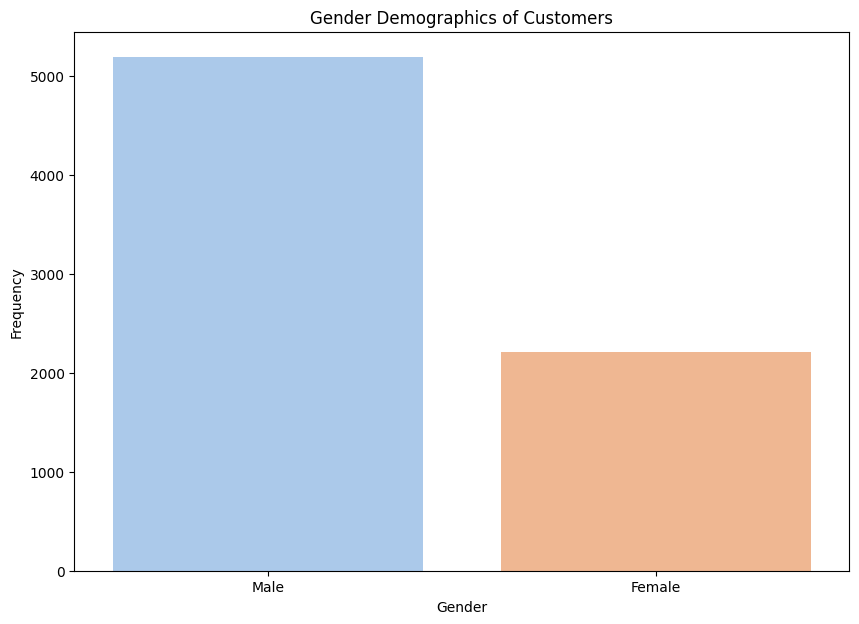

In [111]:
# Customer gender count
gender_counts = df['Buyer Gender'].value_counts()

plt.figure(figsize = (10,7))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')

plt.title('Gender Demographics of Customers')
plt.xlabel('Gender')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [12]:
df['Age Group'] = pd.cut(df['Buyer Age'], bins = (0, 15, 20, 25, 30, 35, 40), labels = ('<=15', '15-20', '20-25', '25-30', '30-35', '>35'))

C:\Users\prern\AppData\Local\Temp\ipykernel_10512\2348200443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = age_counts.index, y = age_counts.values, palette = 'pastel')


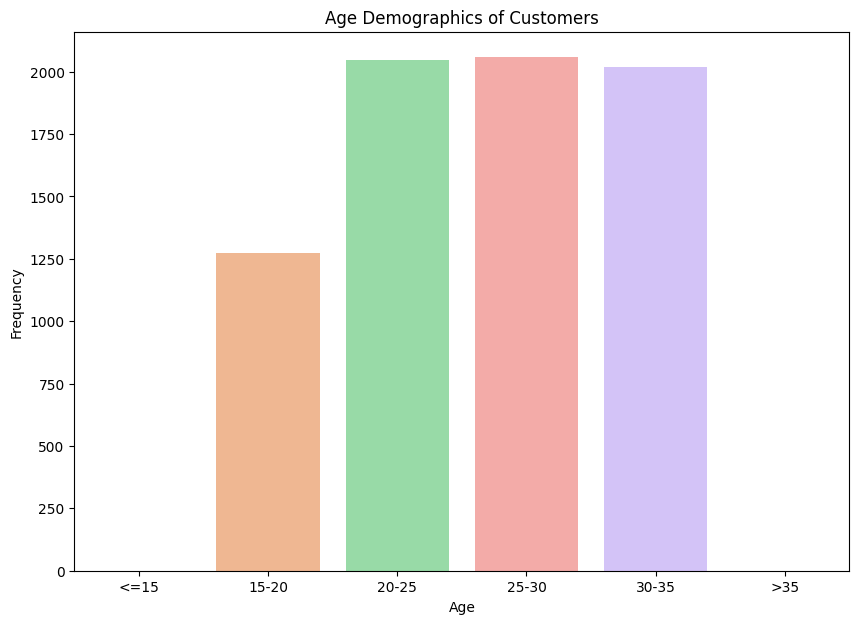

In [112]:
# Customer age group count
age_counts = df['Age Group'].value_counts()

plt.figure(figsize = (10,7))
sns.barplot(x = age_counts.index, y = age_counts.values, palette = 'pastel')
plt.title('Age Demographics of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\prern\AppData\Local\Temp\ipykernel_10512\2507507736.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = product_counts.index, y = product_counts.values, palette = 'pastel')


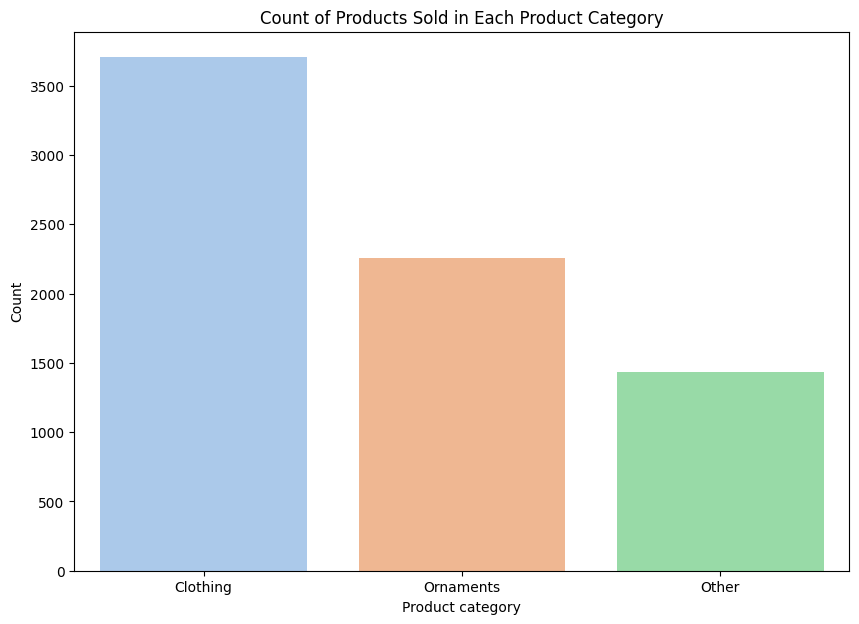

In [113]:
# Category of product sold count
product_counts = df['Product Category'].value_counts()

plt.figure(figsize = (10,7))
sns.barplot(x = product_counts.index, y = product_counts.values, palette = 'pastel')
plt.title("Count of Products Sold in Each Product Category")
plt.xlabel('Product category')
plt.ylabel('Count')
plt.show()

In [15]:
# Gender-wise trend of total sales
gender_sales = df.groupby(['Order Date', 'Buyer Gender'])['Total Sales'].sum().reset_index()

In [16]:
gender_sales.head()

,Order Date,Buyer Gender,Total Sales
0,2023-11-05,Female,637
1,2023-11-05,Male,1317
2,2023-11-06,Female,502
3,2023-11-06,Male,1505
4,2023-11-07,Female,1115


In [17]:
gender_sales_pivot = gender_sales.pivot(index = 'Order Date', columns = 'Buyer Gender', values = 'Total Sales')

gender_sales_pivot.head()

Buyer Gender,Female,Male
Order Date,,
2023-11-05,637.0,1317.0
2023-11-06,502.0,1505.0
2023-11-07,1115.0,1537.0
2023-11-08,390.0,1261.0
2023-11-09,328.0,1654.0


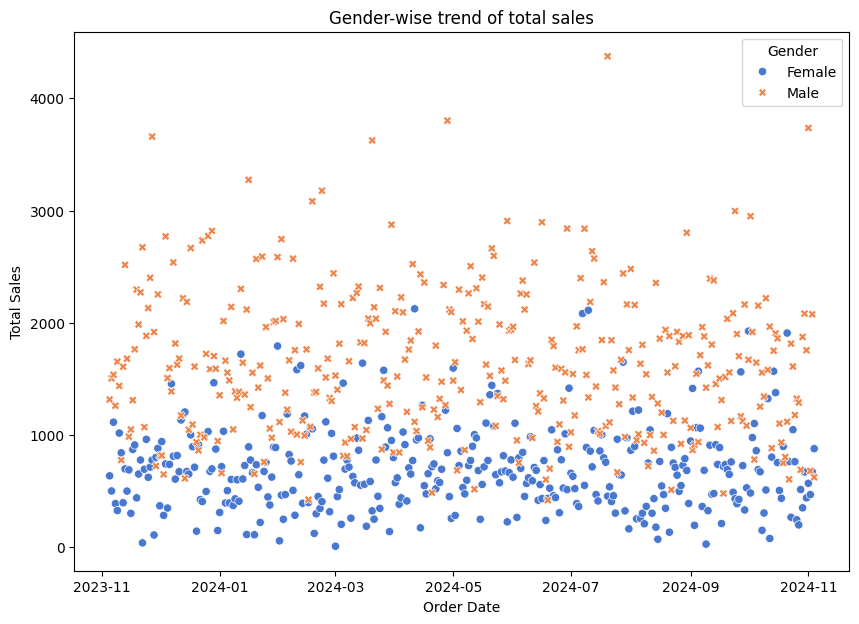

In [114]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = gender_sales_pivot, palette = 'muted')
plt.title('Gender-wise trend of total sales')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.legend(title = 'Gender')
plt.show()

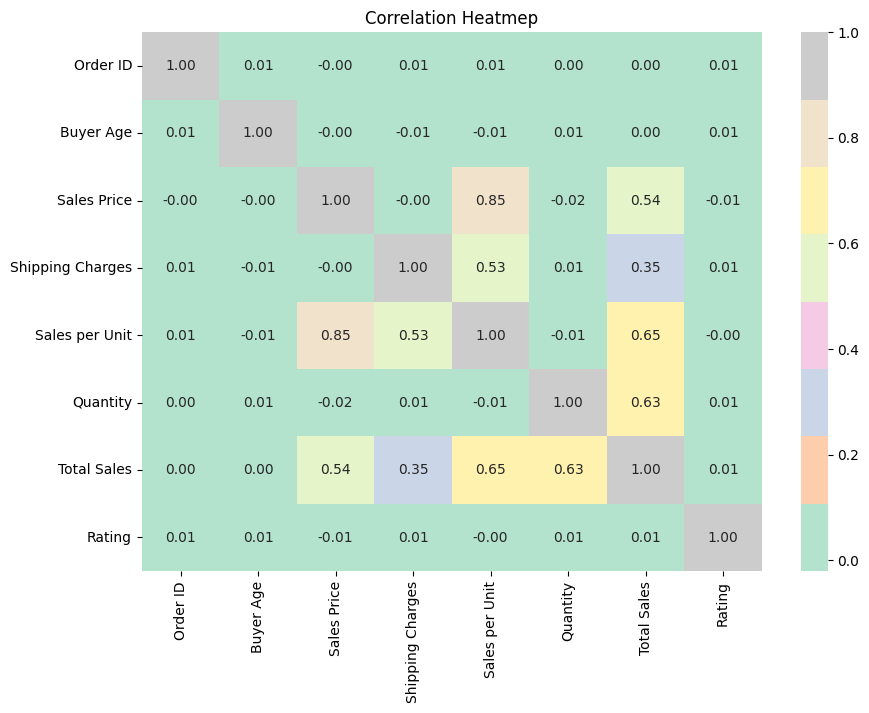

In [122]:
# Correlation heatmap
plt.figure(figsize = (10,7))
sns.heatmap(df.select_dtypes(include = ["number"]).corr(), annot = True, cmap = "Pastel2", fmt = ".2f")
plt.title("Correlation Heatmep")
plt.show()

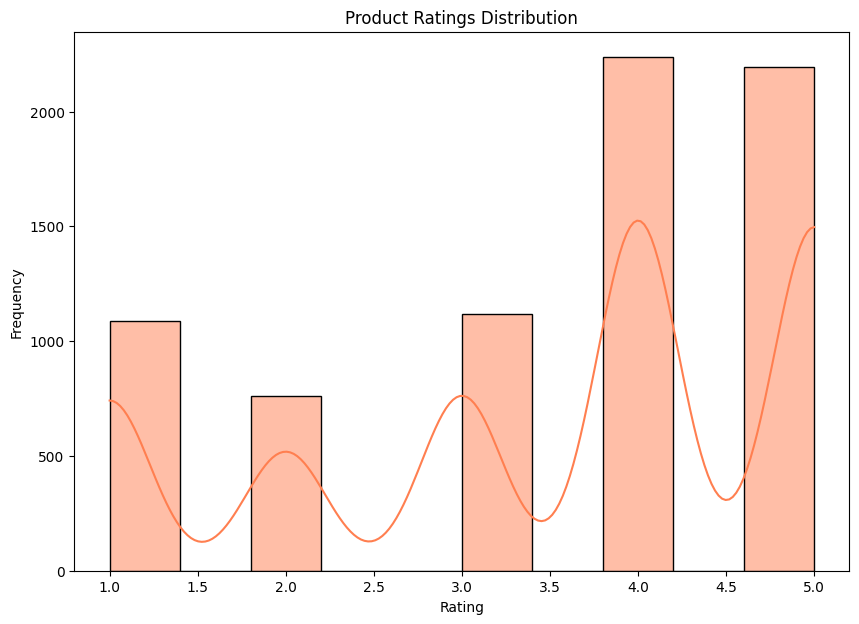

In [116]:
# Product ratings distribution
plt.figure(figsize = (10,7))
sns.histplot(df["Rating"], bins = 10, kde=True, color = "coral")
plt.title("Product Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [24]:
# Average rating of each product category
avg_rating = df.groupby("Product Category")["Rating"].mean()

In [25]:
avg_rating

Product Category
Clothing     3.499460
Ornaments    3.445922
Other        3.581590
Name: Rating, dtype: float64

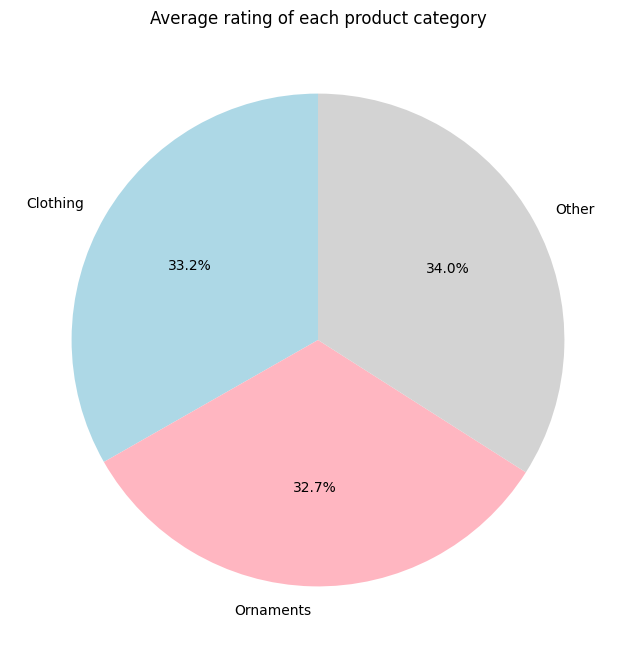

In [117]:
plt.figure(figsize = (11,8))
plt.pie(avg_rating,
       labels = avg_rating.index,
       startangle = 90,
        autopct='%1.1f%%',
       colors = ["lightblue", "lightpink", "lightgrey"])
plt.title("Average rating of each product category")
plt.show()

In [38]:
# Count of customers from each order location
loc_count = df["Order Location"].value_counts()

In [39]:
loc_count

Order Location
New Jersey       434
Portland         420
San Francisco    414
Sacramento       412
San Antonio      408
Memphis          402
Cleveland        390
Las Vegas        385
New York         381
Detroit          378
Pittsburgh       375
Austin           374
Miami            366
Manchester       208
Cardiff          205
Dublin           196
London           191
Liverpool        189
Montreal         187
Mumbai           187
Toronto          185
Sydney           184
Glasgow          178
New Delhi        174
Paris            171
Name: count, dtype: int64

C:\Users\prern\AppData\Local\Temp\ipykernel_10512\2213879392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = loc_count.values, y = loc_count.index, palette = "pastel")


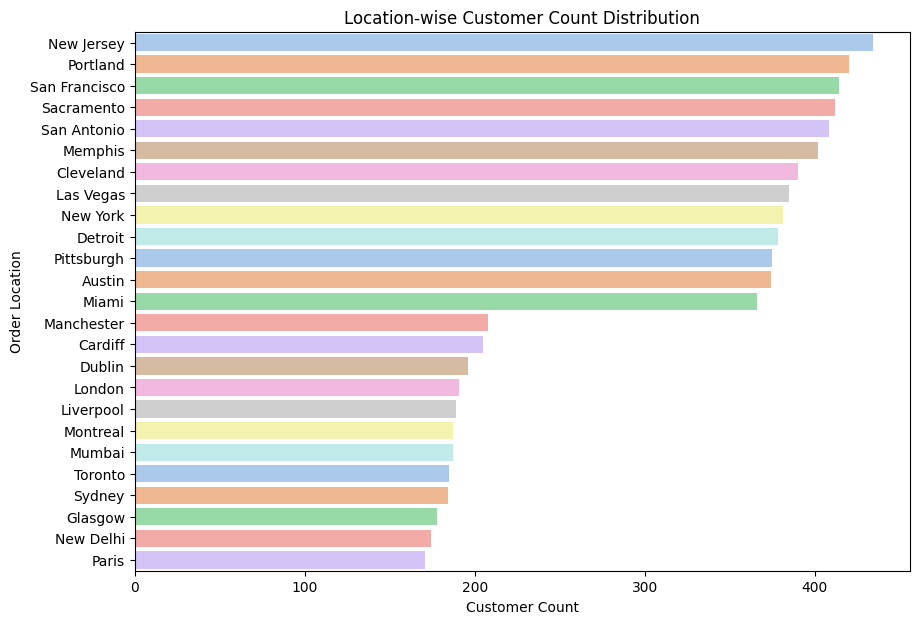

In [118]:
plt.figure(figsize = (10,7))
sns.barplot(x = loc_count.values, y = loc_count.index, palette = "pastel")
plt.xlabel("Customer Count")
plt.ylabel("Order Location")
plt.title("Location-wise Customer Count Distribution")
plt.show()

In [42]:
# Gender-wise customer distribution of top 5 highest customer locations
top_5_loc = loc_count.head(5).index

In [44]:
top_5_loc_df = df[df["Order Location"].isin(top_5_loc)]

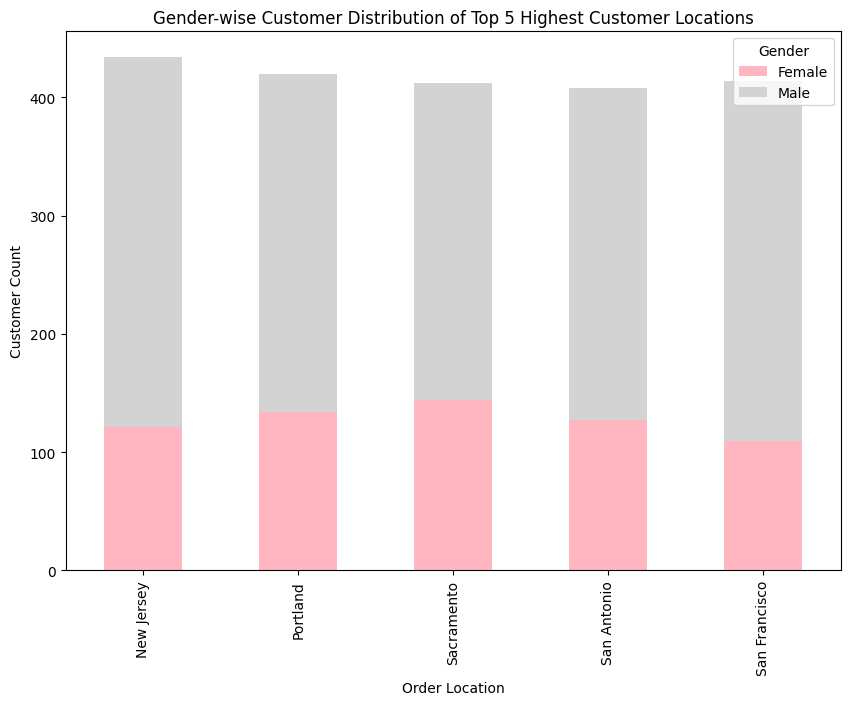

In [120]:
top_5_loc_gender_wise = top_5_loc_df.groupby(["Order Location", "Buyer Gender"]).size().unstack()
top_5_loc_gender_wise.plot(kind = "bar", stacked = True, color = ["lightpink", "lightgrey"], figsize = (10,7))

plt.xlabel("Order Location")
plt.ylabel("Customer Count")
plt.title("Gender-wise Customer Distribution of Top 5 Highest Customer Locations")
plt.legend(title = "Gender")
plt.show()

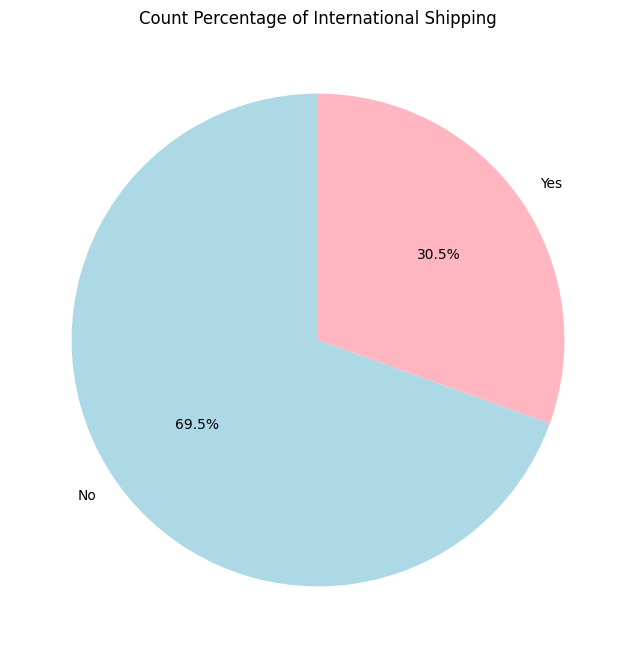

In [121]:
# Count percentage of international shipping
international_count = df["International Shipping"].value_counts()
plt.figure(figsize = (11,8))
plt.pie(international_count,
       labels = international_count.index,
       startangle = 90,
       autopct = "%1.1f%%",
       colors = ["lightblue", "lightpink", "lightgrey"])
plt.title("Count Percentage of International Shipping")
plt.show()

### Key Insights: 
    1. The buyer age data is almost perfectly distributed and not much skewed.
    2. Half of the customers are not paying any shipping charges.
    3. 75% of the customers are buying less than 2 items at once.
    4. Half of the customers have given ratings of 4 or above.
    5. Number of male customers are almost double the number of female customers.
    6. Majority of the customers belong to the age group of 20-35.
    7. Clothing products have the highest sales.
    8. There is no trend nor periodicity in sales with time however, higher sales are done to male cutomers almost each day.
    9. Average rating is similar for all the three product categories.
    10. Almost 50% of the locations have uniformly high customer count while the rest have uniformly low customer count.
